#                                             Netflix EDA

In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
df =pd.read_csv('D:/Data Science Course PR/data set/netflix_titles.csv')

In [3]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
a = df['listed_in'].to_list()
al = []
for i in a:
    if ' International TV Shows' in i:
        a = i
        b = a.replace(' International TV Shows','International TV Shows')
        al.append(b)
    else:
        al.append(i)
df['listed_in'] = al

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Finding the unique values

In [6]:
for i in (df.columns.to_list()):
    b = len(df[i].unique())
    print(f"{i} = {b}")


show_id = 8807
type = 2
title = 8807
director = 4529
cast = 7693
country = 749
date_added = 1768
release_year = 74
rating = 18
duration = 221
listed_in = 514
description = 8775


# <h><b> Handling the missing data and deleting duplicates</h></b>

It is important to handle missing data because any statistical results based on a dataset with non-random missing values could be biased. So you really want to see if these are random or non-random missing values.

Drop the columns which has high number of missing values.

We can impute(filling the missing values using the available information such as mean, median) but we should carefully see the pattern of the column before doing imputation.

For example - You want to fill the height of a person who male. Simpley adding 0 in the missing column would not make sense. So we can take the averega of male height and use that value inplace of missing values.

1>Rating - manually filling the data using data from wedsite.

2>Country - replacing blank countries with the most common country using Mode.

3>Cast - replacing null value with "Data not available".

4>Director - replacing null value with "Data not available".

In [7]:
# Rating data is mentioned incorrectly for few titles in the input file. 
# Hence correcting it by checking the Maturity rating online

df['rating'] = df['rating'].replace({'74 min': 'TV-MA', '84 min': 'TV-MA', '66 min': 'TV-MA'})
df['rating'] = df['rating'].replace({'TV-Y7-FV': 'TV-Y7'})

In [8]:
# using Agreration method
df['rating'] = df['rating'].replace({
                'PG-13': 'Teens - Age above 12',
                'TV-MA': 'Adults',
                'PG': 'Kids - with parental guidence',
                'TV-14': 'Teens - Age above 14',
                'TV-PG': 'Kids - with parental guidence',
                'TV-Y': 'Kids',
                'TV-Y7': 'Kids - Age above 7',
                'R': 'Adults',
                'TV-G': 'Kids',
                 'G': 'Kids',
                'NC-17': 'Adults',
                'NR': 'NR',
                'UR' : 'UR'
                
})

In [9]:
df['rating'].unique()

array(['Teens - Age above 12', 'Adults', 'Kids - with parental guidence',
       'Teens - Age above 14', 'Kids', 'Kids - Age above 7', 'NR', nan,
       'UR'], dtype=object)

In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Replacing Null values

In [11]:
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drop Duplicates
df.drop_duplicates(inplace= True)

df.isnull().sum()
df["country"].fillna(df["country"].mode()[0], inplace = True)


In [12]:
df['month'] = pd.DatetimeIndex(df['date_added']).month

In [13]:
df['release_year'] = df['release_year'].astype('int')

In [14]:
# splitting the genres in different rows to use it in the visualzation  later
df_genre = df[['show_id', 'title','type', 'listed_in' ]]
df_genre = (df_genre.drop('listed_in', axis=1)
             .join
             (
             df_genre.listed_in
             .str
             .split(',',expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('listed_in')           
             ))

df_genre.head()

,show_id,title,type,listed_in
0,s1,Dick Johnson Is Dead,Movie,Documentaries
1,s2,Blood & Water,TV Show,International TV Shows
1,s2,Blood & Water,TV Show,TV Dramas
1,s2,Blood & Water,TV Show,TV Mysteries
2,s3,Ganglands,TV Show,Crime TV Shows


In [15]:
# splitting the countries in different rows 
df_country = df[['show_id', 'title','type', 'country' ]]
df_country = (df_country.drop('country', axis=1)
             .join
             (
             df_country.country
             .str
             .split(', ',expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('country')           
             ))

df_country.head()

,show_id,title,type,country
0,s1,Dick Johnson Is Dead,Movie,United States
1,s2,Blood & Water,TV Show,South Africa
2,s3,Ganglands,TV Show,United States
3,s4,Jailbirds New Orleans,TV Show,United States
4,s5,Kota Factory,TV Show,India


# <h><b> Data Visualization </h></b>

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
a = df.groupby(['type'])['title'].count().reset_index()
a

,type,title
0,Movie,6131
1,TV Show,2676


[]

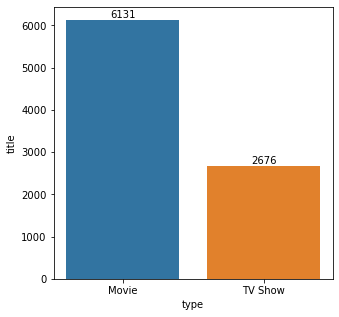

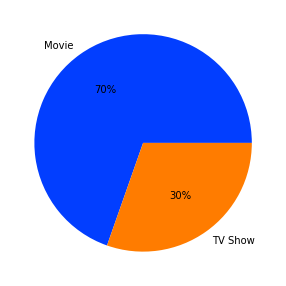

In [18]:
plt.figure(figsize=(5,5))
ax =sns.barplot(data = a , x = 'type', y = 'title',errwidth=0)
ax.bar_label(ax.containers[0])
plt.plot()

plt.figure(figsize=(5,5))
x = a['title'].tolist()
y = a['type'].tolist()
palette_color = sns.color_palette('bright')
plt.pie(x, labels=y,colors=palette_color, autopct='%.0f%%')
plt.plot()


## Netflix main focus is on movies rather than Tv Shows

[]

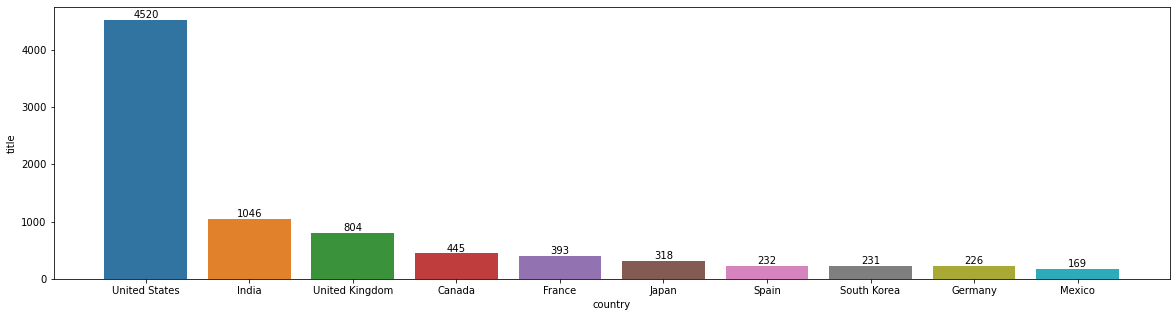

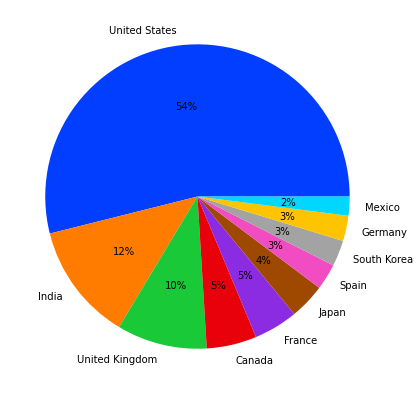

In [19]:
a =df_country.groupby(['country'])['title'].count().reset_index().sort_values(["title"],ascending=False).head(10)
plt.figure(figsize=(20,5))
ax =sns.barplot(data = a , x = 'country', y = 'title',errwidth=0,)
ax.bar_label(ax.containers[0])[0]
plt.plot()

x = a['title'].tolist()
y = a['country'].tolist()
plt.figure(figsize=(7,7))
palette_color = sns.color_palette('bright')
plt.pie(x, labels=y,colors=palette_color, autopct='%.0f%%')[0]
plt.plot()

- Most Of the Netflix Content is US base as it is aquiring more than 50% of pie chart .

In [20]:
a =df_country.groupby(['country'])['title'].count().reset_index().sort_values(["title"],ascending=False).head(10)
top_10_country = a['country'].to_list()
total_count = a['title'].to_list()

In [21]:
# for movies
mov = df_country[df_country['type'] == 'Movie']
b  =mov.groupby(['country'])['title'].count().reset_index().sort_values(["title"])
Mov_num = []
for i in top_10_country:
    for j in range (0,b.shape[0]):
        if i == b.iloc[j,0]:
            c = b.iloc[j,1]
            Mov_num.append(c)
        else:
            pass
        
mov_per = []
for i in range (len(Mov_num)):
    per = int((Mov_num[i]/total_count[i]*100))
    mov_per.append(per)
    
# fro TV show
mov = df_country[df_country['type'] == 'TV Show']
b  =mov.groupby(['country'])['title'].count().reset_index().sort_values(["title"])
TV_num = []
for i in top_10_country:
    for j in range (0,b.shape[0]):
        if i == b.iloc[j,0]:
            c = b.iloc[j,1]
            TV_num.append(c)
        else:
            pass
        
tv_per =[]
for i in mov_per:
    a = 100-i
    tv_per.append(a)

[]

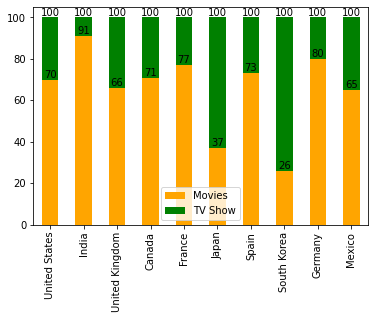

In [22]:
ndf = pd.DataFrame({'Movies': mov_per,'TV Show': tv_per,} ,index= top_10_country)
ax = ndf.plot(kind='bar', stacked=True, color=['orange', 'green'])
ax.bar_label(ax.containers[0])[0]
ax.bar_label(ax.containers[1])[0]
plt.plot()

## Conculation
We can say that in India Movie percentage is more as comapire the rest of countries because of Bollowood and recent growth in South indurtries.

South Korea have more Tv show percentage as compair to rest of the countries because of their love for K-Drama.

In [23]:
a = df.groupby(['release_year','type'])['title'].count().reset_index()

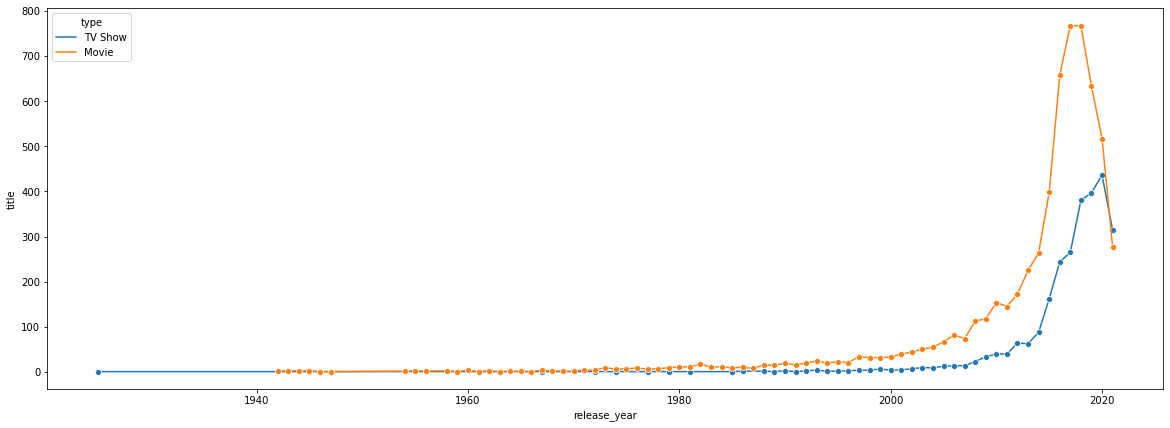

In [24]:
plt.figure(figsize=(20,7))
sns.lineplot(data=a, x="release_year", y="title" ,hue = "type",marker = "o")
plt.show()

In [25]:
a = a[a['release_year']>=2000]

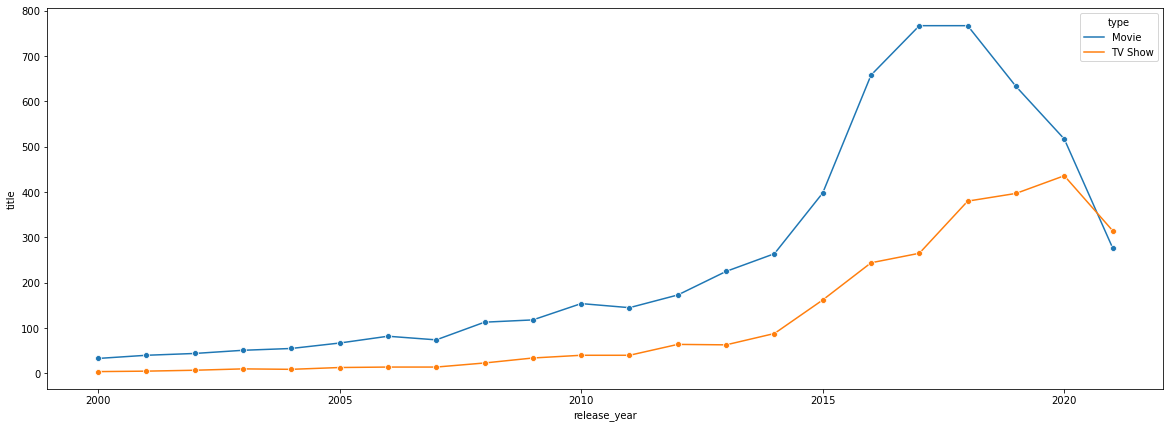

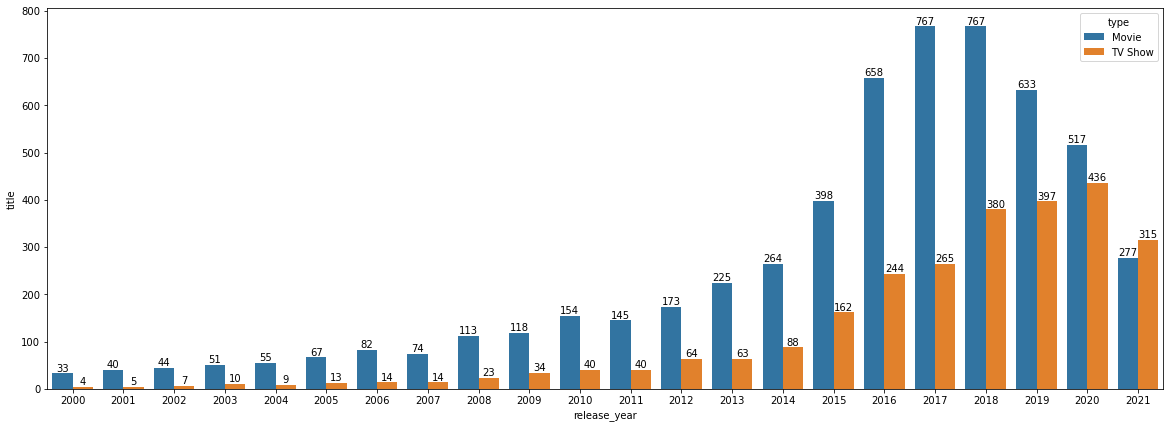

In [26]:
plt.figure(figsize=(20,7))
sns.lineplot(data=a, x="release_year", y="title" ,hue = "type",marker = "o")
plt.show()
plt.figure(figsize=(20,7))
ax =sns.barplot(data=a, x="release_year", y="title" ,hue = "type")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

# Conclusion
- Their is a steady growth in both Movies & Tv show till 2014 after that Production of Movies is increase exponentially from     2014 to 2018.

- Following 4 years from 2019 to 2022, the Production of Movies decreased exponentially and in the year 2021 number of TV shows   is more as compared to Movies.

- From the year 2018, there is a rapid decrease in the content on Netflix.

Text(0, 0, 'International TV Shows')

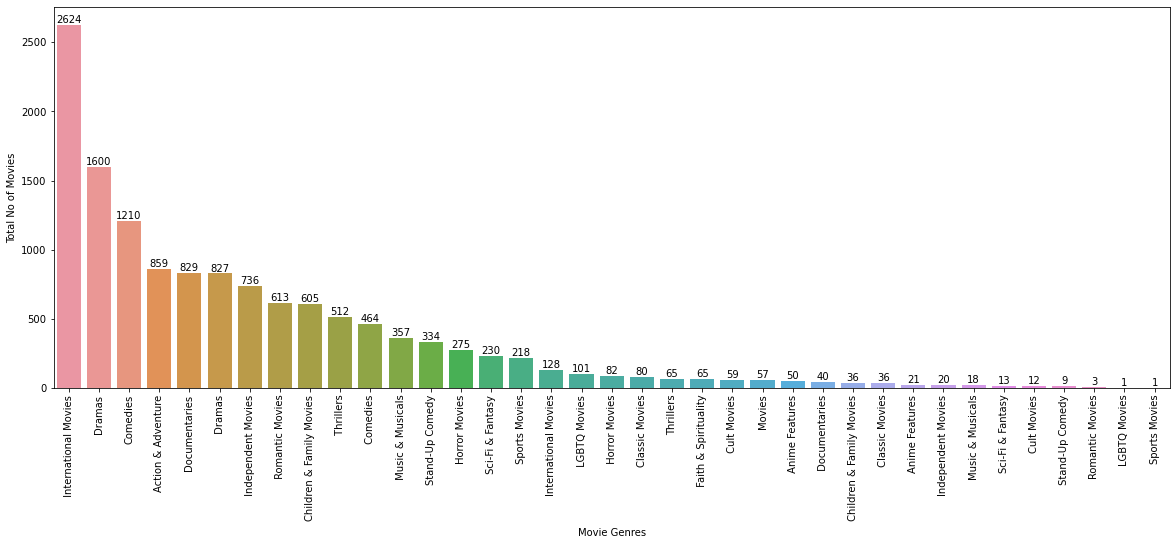

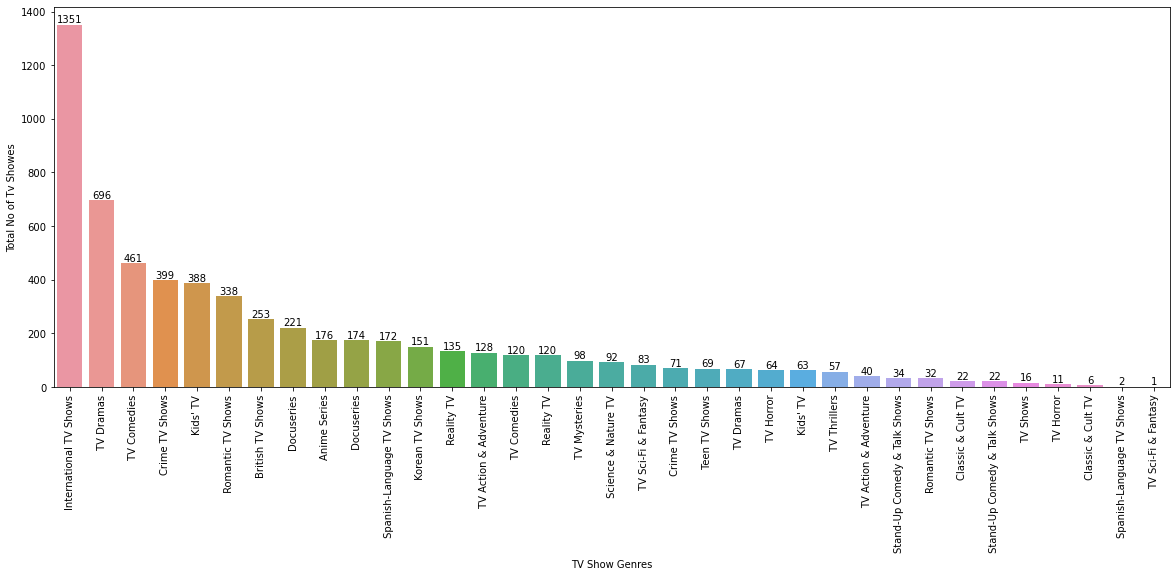

In [27]:
new_genre = df_genre.groupby(['type','listed_in'])['title'].count().reset_index()
movie_genre = new_genre[new_genre['type'] == 'Movie' ].sort_values(["title"],ascending=False)
movie_genre.rename(columns = {'title':'Total No of Movies','listed_in':'Movie Genres'}, inplace = True)
plt.figure(figsize = (20,7))
ax =sns.barplot(data=movie_genre, x="Movie Genres", y="Total No of Movies")
ax.bar_label(ax.containers[0])[0]
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)[0]
# for tv shows
Tv_genre = new_genre[new_genre['type'] == 'TV Show' ].sort_values(["title"],ascending=False)
Tv_genre.rename(columns = {'title':'Total No of Tv Showes','listed_in':'TV Show Genres'}, inplace = True)
plt.figure(figsize = (20,7))
ax =sns.barplot(data=Tv_genre, x="TV Show Genres", y="Total No of Tv Showes")
ax.bar_label(ax.containers[0])[0]
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)[0]

# Conclusion:
- In both Movie and Tv Show the top three genres are International TV shows / Movies , Drama , Comedy.

[]

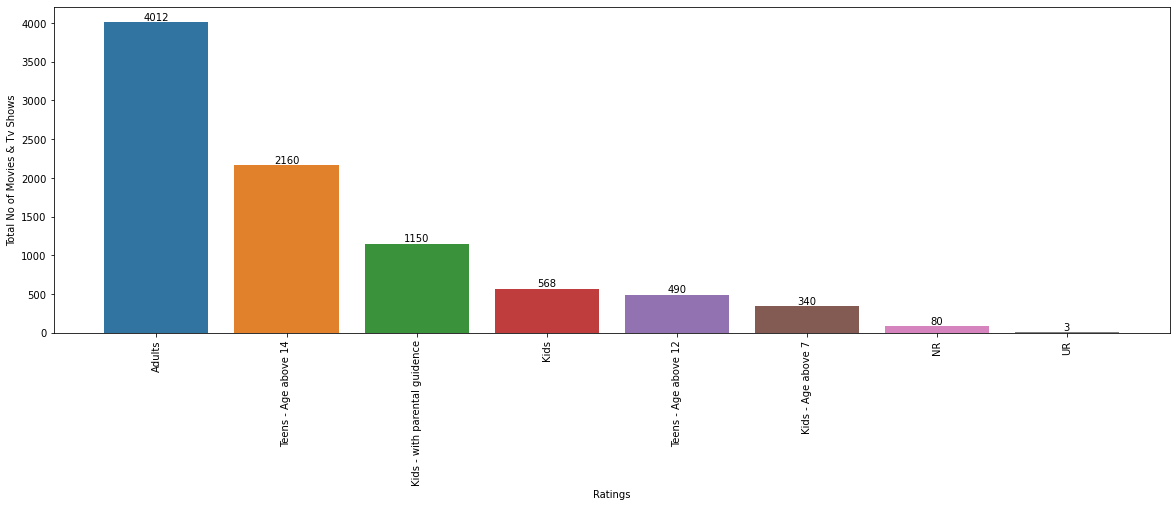

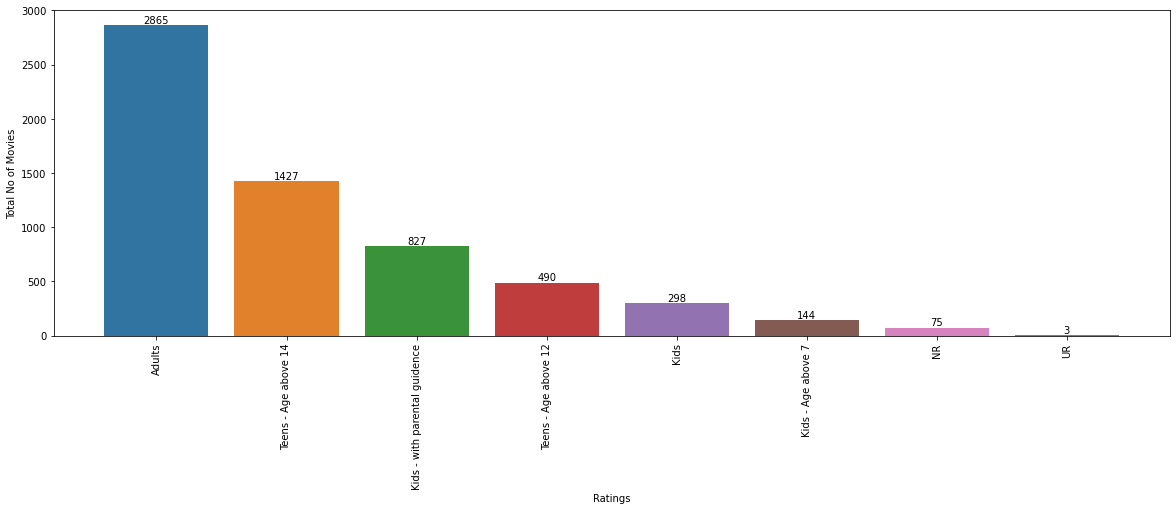

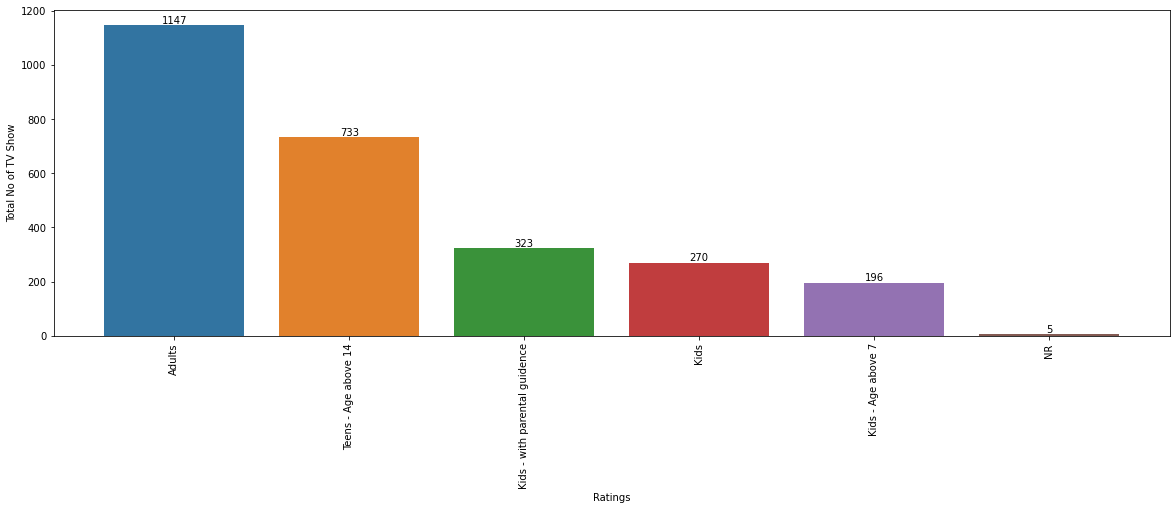

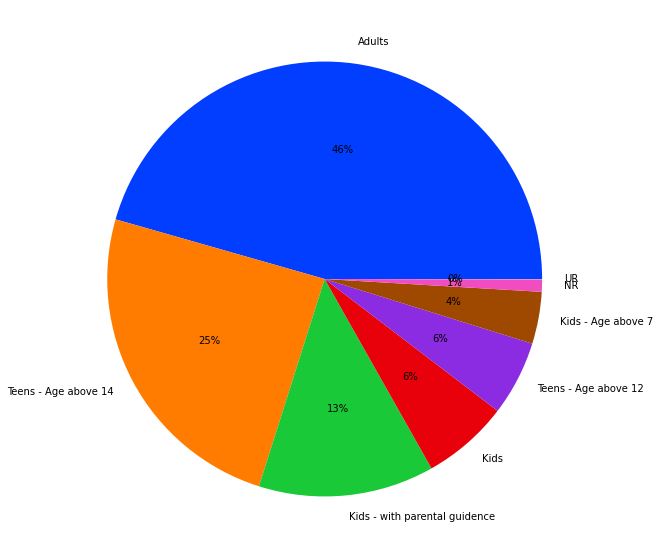

In [28]:
rating = df.groupby(['rating'])['title'].count().reset_index().sort_values(["title"],ascending=False)
rating.rename(columns = {'title':'Total No of Movies & Tv Shows','rating':'Ratings'}, inplace = True)
plt.figure(figsize = (20,6))
ax = sns.barplot(data =rating,x = 'Ratings',y ='Total No of Movies & Tv Shows')
ax.bar_label(ax.containers[0])[0]
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)[0]
plt.plot()

# On basies of type of content
#for Movies
rating_all =df.groupby(['type','rating'])['title'].count().reset_index().sort_values(["title"],ascending=False)
rating_all.rename(columns = {'rating':'Ratings'}, inplace = True)
rating_movies =rating_all[rating_all['type'] == "Movie"]
rating_movies.rename(columns = {'title':'Total No of Movies','rating':'Ratings'}, inplace = True)
plt.figure(figsize = (20,6))
bx = sns.barplot(data =rating_movies,x = 'Ratings',y ='Total No of Movies')
bx.bar_label(bx.containers[0])[0]
bx.set_xticklabels(bx.get_xticklabels(), rotation=90)[0]
plt.plot()

# On basies of type of content
#for Tv Show
rating_tv =rating_all[rating_all['type'] == "TV Show"]
rating_tv.rename(columns = {'title':'Total No of TV Show','rating':'Ratings'}, inplace = True)
plt.figure(figsize = (20,6))
cx = sns.barplot(data =rating_tv,x = 'Ratings',y ='Total No of TV Show')
cx.bar_label(cx.containers[0])[0]
cx.set_xticklabels(cx.get_xticklabels(), rotation=90)[0]
plt.plot()

#pie chart

y = rating['Ratings'].tolist()
x = rating['Total No of Movies & Tv Shows'].tolist()
plt.figure(figsize=(10,10))
palette_color = sns.color_palette('bright')
plt.pie(x, labels=y,colors=palette_color, autopct='%.0f%%')[0]
plt.plot()

# Conclusion:
- Most of Netflix content is Adult/Mature as we can see above 46% content is of Adult rating.

- In both Movies and Tv show most of the content is Adult rating.

- Their is no (PG-13'/'Teens - Age above 12) Tv show on Netflix.

- More than 70% of Netflix content is divied in two type of rating Adult and Teens-Age aboce 14

In [29]:
# We need to fill the duration by using mean function
new_dataframe = pd.DataFrame()
Movie_dataframe = df[df['type'] == 'Movie']
Tv_dataframe = df[df['type'] == 'TV Show']
temp_data = Movie_dataframe.dropna()
# #finding mean
lis1 = temp_data['duration'].to_list()
lis2 = []
for i in lis1:
    a =i
    b = a.split(' ')[0]
    lis2.append(int(b))
temp_data['duration'] = lis2
mean_time= int(temp_data['duration'].mean())
# repalcing null values with mean
df['duration'].replace(np.nan, mean_time,inplace  = True)

[]

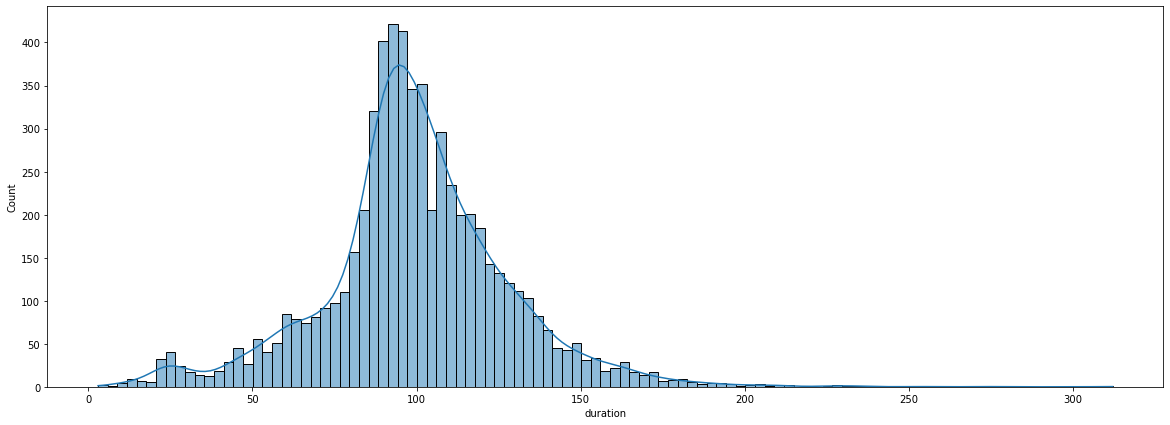

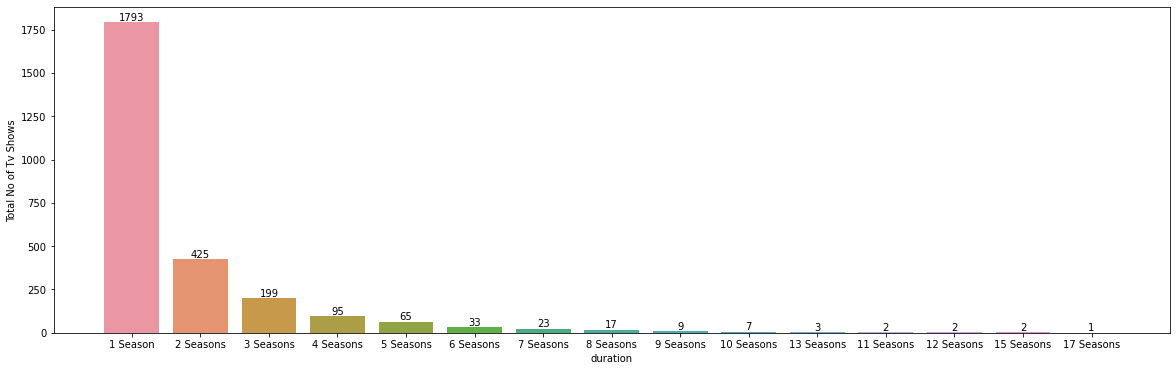

In [30]:
movie_data_new  = temp_data.iloc[:,[2,9]]
plt.figure(figsize=(20,7))
ax = sns.histplot(data = movie_data_new, x = "duration", kde = True)
# ax.his_label(ax.containers[0])[0]

Tv_dataframe1 = Tv_dataframe.groupby(['duration'])['title'].count().reset_index().sort_values(["title"],ascending=False)
Tv_dataframe1.rename(columns = {'title':'Total No of Tv Shows'}, inplace = True)
plt.figure(figsize = (20,6))
ax = sns.barplot(data =Tv_dataframe1,x = 'duration',y ='Total No of Tv Shows')
ax.bar_label(ax.containers[0])[0]
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)[0]
plt.plot()

# Conclusion:
- The duration for most movies on netflix falls between 80-120 mins with very few movies more than 150 mins.

- Most shows on Netflix has only season1.